# Importing libraries

In [711]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd

# Setting up pytrends

In [713]:
pytrends = TrendReq(hl='en-US', tz=360)

# Creating "keyword" variable and building pytrends payload

In [714]:
keywords = ['knotts scary farm', 'halloween horror nights', 'oogie boogie bash']
pytrends.build_payload(kw_list=keywords, cat=0, timeframe='today 1-m', geo='US', gprop='')

# Creating variable to call on pytrends related queries

In [717]:
related_df = pytrends.related_queries()

# Creating an empty dictionary followed by a loop that appends keywords and types from related_df

In [718]:
all_results = []

for kw in keywords:
    if kw in related_df:
        for type in ['top', 'rising']:
            df = related_df[kw][type]
            if df is not None and not df.empty:
                df = df.copy()
                df['keyword'] = kw
                df['type'] = type
                all_results.append(df)

# Combining all search results into one list using concat

In [719]:
combined_df = pd.concat(all_results, ignore_index=True)

# Setting the option to view all rows printed

In [720]:
pd.set_option('display.max_rows', None)

In [721]:
print(combined_df)

                                                 query   value  \
0                            knotts scary farm tickets     100   
1                              knott's scary farm 2025      74   
2                               knotts scary farm pass      65   
3                                        horror nights      56   
4                                   knott's berry farm      49   
5                              universal horror nights      33   
6                              halloween horror nights      30   
7                              knotts scary farm hotel      22   
8                        knotts scary farm season pass      21   
9                                           disneyland      19   
10                            knotts scary farm boofet      19   
11                          knotts scary farm packages      17   
12              how much are knotts scary farm tickets      17   
13                             knotts scary farm hours      16   
14       w

# Creating a loop that searches through every row in combined_df. Then printing an inverse barchart that prints the top related searches for each keyword

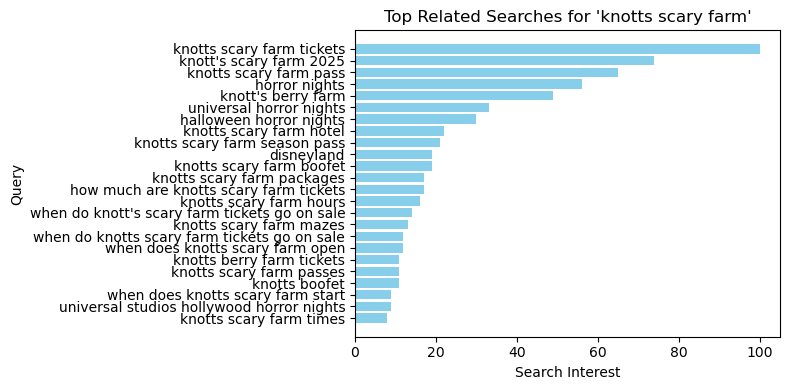

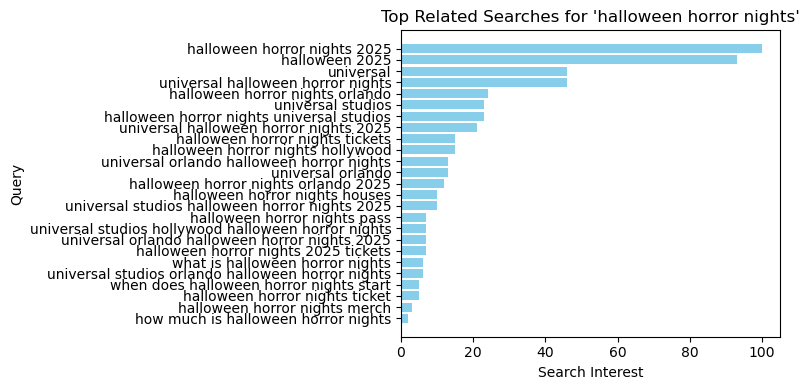

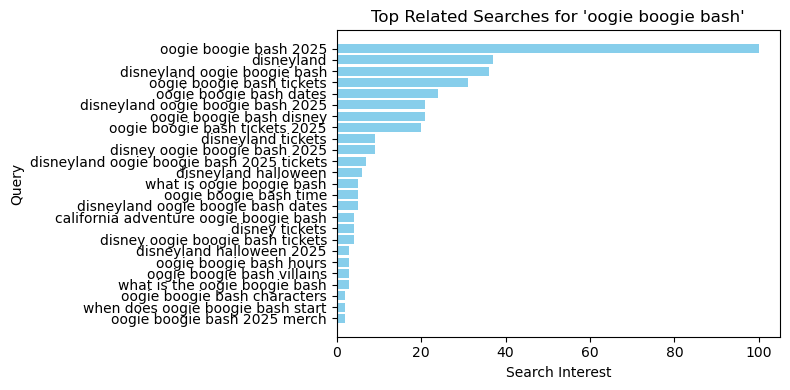

In [722]:
for kw in keywords:
    subset = combined_df[(combined_df['keyword'] == kw) & (combined_df['type'] == 'top')]
    plt.figure(figsize=(8, 4))
    plt.barh(subset['query'], subset['value'], color='skyblue')
    plt.title(f"Top Related Searches for '{kw}'")
    plt.xlabel('Search Interest')
    plt.ylabel('Query')
    plt.gca().invert_yaxis()  # Highest at top
    plt.tight_layout()
    plt.show()

# Creating a loop that searches through every row in combined_df. Then printing an inverse barchart that prints the rising related searches for each keyword

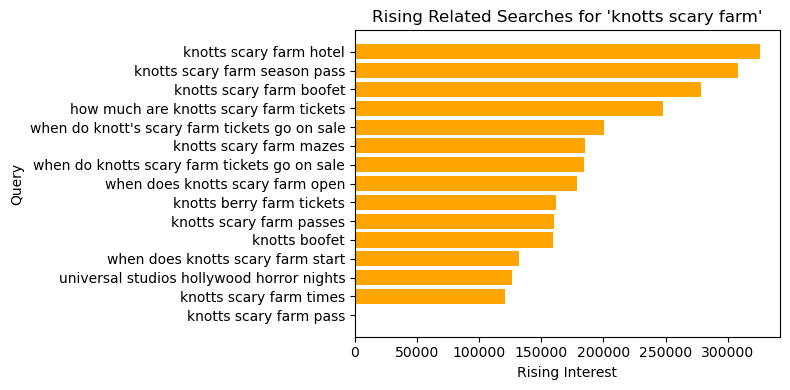

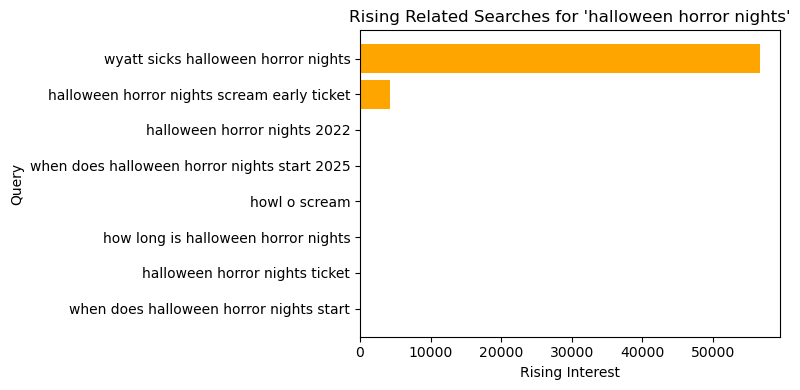

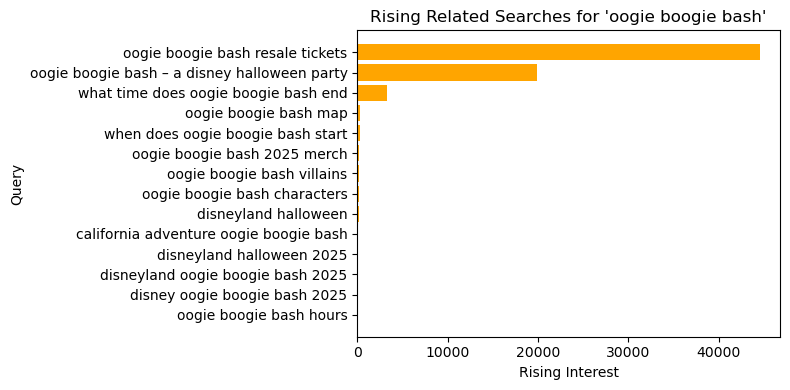

In [723]:
for kw in keywords:
    subset = combined_df[(combined_df['keyword'] == kw) & (combined_df['type'] == 'rising')]
    plt.figure(figsize=(8, 4))
    plt.barh(subset['query'], subset['value'], color='orange')
    plt.title(f"Rising Related Searches for '{kw}'")
    plt.xlabel('Rising Interest')
    plt.ylabel('Query')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Grabbing the combined_df data frame and converting it into a csv file

In [731]:
combined_df.to_csv('googletrendshalloween.csv')